# Attempting to use Multi-class Logistic Regression

## Imports

In [58]:
from sklearn.linear_model import LogisticRegression
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

## Reading and Storing the Dataset

In [59]:
dataset = pandas.read_csv("processed.cleveland.data")
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


## Preprocessing the data

In [60]:
dataset = dataset.replace('?', None)
dataset.dropna(inplace=True)

X = dataset.iloc[:, 0:13]
y = dataset.iloc[:,-1]

## Normalising the dataset

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

X

array([[ 0.93618065,  0.69109474, -2.24062879, ...,  2.26414539,
        -0.72197605,  0.65587737],
       [ 1.3789285 ,  0.69109474,  0.87388018, ...,  0.6437811 ,
         2.47842525, -0.89422007],
       [ 1.3789285 ,  0.69109474,  0.87388018, ...,  0.6437811 ,
         1.41162482,  1.17257652],
       ...,
       [ 1.48961547,  0.69109474,  0.87388018, ...,  0.6437811 ,
         1.41162482,  1.17257652],
       [ 0.27205887,  0.69109474,  0.87388018, ...,  0.6437811 ,
         0.34482438,  1.17257652],
       [ 0.27205887, -1.44697961, -1.20245913, ...,  0.6437811 ,
         0.34482438, -0.89422007]])

## Correlation heatmap

<AxesSubplot:>

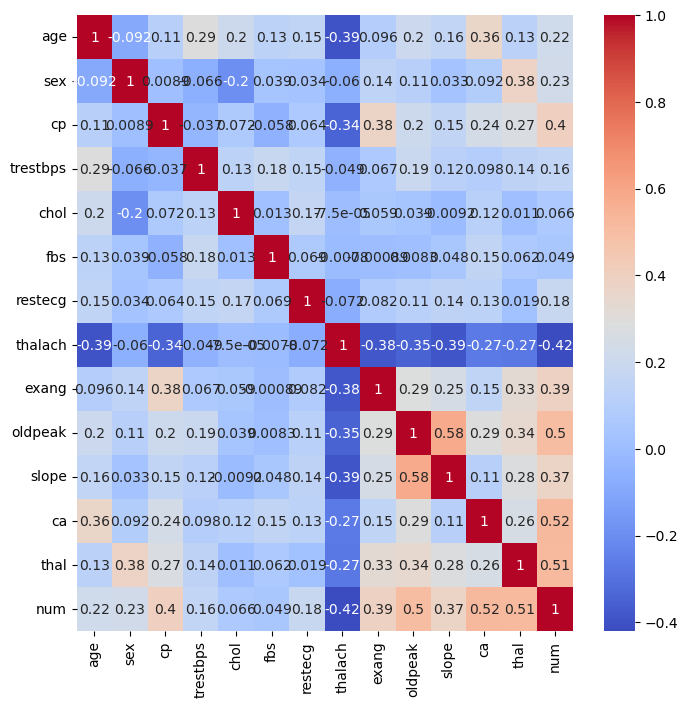

In [62]:
plt.figure(figsize=(8,8))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")

## Training and evaluating the model

In [ ]:
from sklearn.model_selection import train_test_split

# X = features, y = labels (with multiple classes)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,        # 20% for testing
    stratify=y,           # <--- This ensures stratified split
    random_state=42       # For reproducibility
)

from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga', 'newton-cholesky'],
    'multi_class': ['multinomial', 'auto', 'ovr']
}

grid = GridSearchCV(LogisticRegression(class_weight="balanced"), params, cv=10, scoring='accuracy')
grid.fit(X, y)

best_model = grid.best_estimator_

/home/pratham/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/pratham/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/pratham/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/pratham/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_cla

In [ ]:
from sklearn.metrics import classification_report

y_pred = best_model.predict(X_test)

print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy on test set: 0.65

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        32
           1       0.40      0.36      0.38        11
           2       0.33      0.29      0.31         7
           3       0.57      0.57      0.57         7
           4       0.20      0.33      0.25         3

    accuracy                           0.65        60
   macro avg       0.48      0.49      0.48        60
weighted avg       0.66      0.65      0.65        60

